## Final Project Submission

* Student name:                        KEVIN GIROUX
* Student pace:                        FULL TIME
* Scheduled project review date/time:  (TBD)
* Instructor name:                     JAMES IRVING
* Blog post URL:                       (TBD)


# Introduction

##### My overall methodology for organizing and analyzing this data was as follows.  I started by reviewing the provided datasets, grouping them by the type of information they contained, and determining which dataset would serve as the a good starting point for my analysis.  After some online research, I determined the IMDB datasets to be a good place to start for their mergability with each other along IMDB ID tags and for my ability to employe the IMDbPY toolkit to query IMDB's API and fill in any gaps in the data provided (namely, movie financial data).  

##### Once I finished querying all additional features I wanted to loop into my analysis, I merged them all together and cleaned the data down to a set of 551 movies for analysis.  

# Review of provided data; gap analysis

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

/Users/kevingiroux/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# general movie metadata
imdb_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
rt_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
title_aka_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz')

# ratings and review data
ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
tmdb_ratings_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='latin1')

# people
ppl_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
crew_df = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
principals_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

# financials
gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

## Qualitative description of data sets:


### a. Movie background info and metadata
- imdb_df:  (IMDB) movie titles (w/ IMDB title id) by release year, runtime, and genre
- rt_df:  (Rotten Tomatoes) synopsis, rating, genre, director, writer, runtime, etc.
- title_aka_df:  (IMDB) movie titles (w/ IMDB title id) in different languages

### b. Reviews and ratings
- ratings_df:  (IMDB) average rating and vote count, by IMDB title id
- tmdb_ratings_df:  (TMDB) popularity score, with vote counts and average vote score, by title 
- rt_reviews_df:  (Rotten Tomatoes) includes review text, numerical rating, and review publisher

### c. People involved
- ppl_df:  (IMDB) info on humans involved, such as birth year, primary profession, and movies they are known for (by title id)
- crew_df:  (IMDB) directors and writers, by movie id (matches title id with name id)
- principals_df:  (IMDB) (title id, name id) categorized list of people by role/job in film production (includes list of characters for actors/actresses)

### d. Financial
- gross_df:  (BOM) domestic and foreign gross rev by movie title, studio, and year
- budget_df: (TN) production budget vs. domestic and worldwide gross rev, by movie title (no movie id!)


##### Below, I will examine each of the above sub-sets of data in more detail and draw conclusions on which data sets/features to use and how

## a. Movie background info and metadata
- imdb_df: 'genres' column contains list of multiple genres separated by comma (no spaces)
- rt_df: no movie titles are included, just an RT movie id;  'rating', 'director', 'writer', 'theater_date', 'studio', 'box_office' are all unique features to RT data
- title_aka_df: not sure I will need this data


##### CONCLUSIONS: 
- Use imdb_df as my base data set
- look for ways to pull in 'rating', 'studio', 'theater_date' and 'box_office' from rt_df or the internet

In [4]:
imdb_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
rt_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [6]:
title_aka_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


## b. Reviews and ratings
- ratings_df: imdb title id, average score and number of votes...needs enrichment
- tmdb_ratings_df: has a lot of cool features like a popularity score, release date, vote_average, vote_count, original_language -- can by joined by 'original_title' or 'title'
- rt_reviews_df: again, no movie titles included, includes a top critic designation which is cool, and a fresh/not fresh binary categorization column, also 'publisher' columns

##### CONCLUSIONS:
- use ratings_df as my starting point for reviews and ratings data, because of easy join-ability with movie metadata via IMDB title id
- find way to enrich this review data via API/web-scraping or by joining some features from the TMDB dataset, which has a lot of features that would be interesting to play with ('original language', 'popularity', 'vote_average', 'vote count')
- RT data has a couple interesting features, but no movie title column will make this data very hard to join with my other rating/review data

In [7]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
tmdb_ratings_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [9]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


## c. People involved
- ppl_df: full list of people in film industry, with unique imdb name ids, known_for_titles by imdb title id
- crew_df: imdb name ids for directors and writers, associated with imdb film ids
- principals_df: imdb film ids, with imdb name ids of principal resources associated, by job function

##### CONCLUSIONS:
- principals_df could be useful for developing recommendations for specific writers, directors, actors/actresses, etc. to use
- may need to use ppl_df and crew_df to perform any necessary joins between people data and our other data sub-sets (movie metadata, ratings/reviews, and financials)
- all of these are from IMDB and use IMDB's title ID and name ID, which should make for easy joining

In [10]:
ppl_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [11]:
crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [12]:
principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


## d. Financials
- gross_df: includes a feature for studio abbreviations and a feature for the year the film was released
- budget_df: includes a budget feature, along with revenue data, as well as a full 'release_date' feature

##### CONCLUSIONS:
- this will be the most challenging sub-set of data to join with the rest, as neither of the provided financial datasets is from IMDB
- leaning towards using budget_df exclusively for my financial data at this point, due to inclusion of 'budget' feature and full 'release_date' feature rather than just the release year
- hopefully there will be a more direct way to scrape and integrate these numbers from the internet

In [13]:
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Gap analysis

- Use imdb_df as my base data set for movie metadata
    - look for ways to pull in 'rating', 'studio', 'theater_date' and 'box_office' from rt_df or from the internet


- Use ratings_df as my starting point for reviews and ratings data, because of easy join-ability with movie metadata via IMDB title id
    - join in 'original language', 'popularity', 'vote_average', 'vote count' from tmdb_ratings_df or internet
    - Unlikely to use RT data due to lack of movie title feature


- Use principals_df for developing recommendations on specific writers, directors, actors/actresses, etc. to use (join with metadata via IMDB ID)
    - may need to use ppl_df and crew_df to complete the joins with final combined dataset


- sources of financial provided are NOT from IMDB, so cannot join financials via IMDB ID as above
    - budget_df includes 'budget' along with gross totals, so this is the better of the two provided sets of data
    - finding ways to scrape financials from web will be a top priority 

# Cleaning and tidying

In [15]:
# I know these data sets are messy, so before attempting to clean I jumped online and found a Python toolkit called
# IMDbPY that was specifically designed to query IMDb using python.  I will import below and see what gaps I can fill
# in imdb_df using the API before attempting any joins.

## Exploring IMDbPY Python toolkit

In [16]:
import imdb
ia = imdb.IMDb()

In [17]:
# List of the sets of features we can import using IMDbPY
ia.get_movie_infoset()

['airing',
 'akas',
 'alternate versions',
 'awards',
 'connections',
 'crazy credits',
 'critic reviews',
 'episodes',
 'external reviews',
 'external sites',
 'faqs',
 'full credits',
 'goofs',
 'keywords',
 'list',
 'locations',
 'main',
 'misc sites',
 'news',
 'official sites',
 'parents guide',
 'photo sites',
 'plot',
 'quotes',
 'recommendations',
 'release dates',
 'release info',
 'reviews',
 'sound clips',
 'soundtrack',
 'synopsis',
 'taglines',
 'technical',
 'trivia',
 'tv schedule',
 'video clips',
 'vote details']

In [18]:
# List of features within the feature set 'main'
# NOTE Moonlight (2016) aka 'tt4975722' used as placeholder for all following queries of IMDbPY
ia.get_movie('4975722', info='main').keys()

['original title',
 'cast',
 'genres',
 'runtimes',
 'countries',
 'country codes',
 'language codes',
 'color info',
 'aspect ratio',
 'sound mix',
 'box office',
 'certificates',
 'original air date',
 'rating',
 'votes',
 'cover url',
 'imdbID',
 'plot outline',
 'languages',
 'title',
 'year',
 'kind',
 'directors',
 'writers',
 'producers',
 'composers',
 'cinematographers',
 'editors',
 'editorial department',
 'casting directors',
 'production designers',
 'art directors',
 'set decorators',
 'costume designers',
 'make up department',
 'production managers',
 'assistant directors',
 'art department',
 'sound department',
 'visual effects',
 'stunts',
 'camera department',
 'casting department',
 'costume departmen',
 'location management',
 'music department',
 'script department',
 'miscellaneous',
 'thanks',
 'akas',
 'writer',
 'director',
 'production companies',
 'distributors',
 'special effects',
 'other companies',
 'canonical title',
 'long imdb title',
 'long imdb can

### Programmatic exploration of toolkit
#### a. Movie metadata
- movie rating:  IMDbPY 'main' 'certificates' (this lists theater rating for all countries, need to isolate US)
- studio:  IMDbPY 'main' 'production companies'
- theater date:  IMDbPY 'main' 'original air date' AND 'year'
- PLUS original language:  this could be pulled in from TMDB_ratings_df as well

#### b. Ratings and reviews
- IMDbPY 'vote details' 'demographics' for demographic info about top voters of movies)
- PLUS still need to join in TMDB_ratings_df for 'popularity', 'vote_average', 'vote_count'

#### c. People
- FIRST I want to explore principals_df, but if that proves to be too complicated for joining....
- if not, I can at least pull 'writer' and 'director' data from IMDbPY

#### d. Financials
- IMDbPY 'main' 'box office' (includes budget, opening weekend gross, domestic gross, global gross)

In [19]:
ia.get_movie('4975722', info='main')['certificates']

['Argentina:16',
 'Australia:M',
 'Austria:16',
 'Brazil:16',
 'Canada:14A::(Alberta/British Columbia/Manitoba)',
 'Canada:13+::(Quebec)',
 'Chile:14',
 'Colombia:12',
 'Denmark:11',
 'Finland:K-12',
 'France:Tous publics',
 'Germany:12',
 'Greece:K-16',
 'Hong Kong:IIB',
 'Hungary:16',
 'India:A',
 'Indonesia:17+',
 'Ireland:15A',
 'Italy:T',
 'Japan:R15+',
 'Lithuania:N-13',
 'Malaysia:(Banned)',
 'Malta:15',
 'Mexico:B15',
 'Netherlands:12',
 'New Zealand:M',
 'Norway:12',
 'Philippines:R-16',
 'Portugal:M/16',
 'Singapore:M18',
 'South Africa:13',
 'South Korea:15',
 'Spain:16',
 'Sweden:11',
 'Switzerland:14',
 'Taiwan:R-15',
 'Turkey:15+',
 'United Kingdom:15',
 'United States:R',
 'Ukraine:16']

In [20]:
ia.get_movie('4975722', info='main')['production companies']

[<Company id:0390816[http] name:_A24_>,
 <Company id:0641956[http] name:_PASTEL_>,
 <Company id:0136967[http] name:_Plan B Entertainment_>]

In [21]:
ia.get_movie('4975722', info='main')['box office']

{'Budget': '$1,500,000 (estimated)',
 'Opening Weekend United States': '$1,488,740, 18 Nov 2016',
 'Cumulative Worldwide Gross': '$55,561,162, 20 Mar 2017'}

In [22]:
ia.get_movie('4975722', info='vote details')['demographics']

{'imdb users': {'votes': 261847, 'rating': 7.4},
 'aged under 18': {'votes': 295, 'rating': 7.9},
 'aged 18 29': {'votes': 68709, 'rating': 7.6},
 'aged 30 44': {'votes': 84075, 'rating': 7.2},
 'aged 45 plus': {'votes': 20049, 'rating': 7.2},
 'males': {'votes': 147071, 'rating': 7.3},
 'males aged under 18': {'votes': 202, 'rating': 8.0},
 'males aged 18 29': {'votes': 50751, 'rating': 7.6},
 'males aged 30 44': {'votes': 67279, 'rating': 7.2},
 'males aged 45 plus': {'votes': 15888, 'rating': 7.1},
 'females': {'votes': 39010, 'rating': 7.6},
 'females aged under 18': {'votes': 67, 'rating': 7.8},
 'females aged 18 29': {'votes': 16082, 'rating': 7.7},
 'females aged 30 44': {'votes': 15275, 'rating': 7.5},
 'females aged 45 plus': {'votes': 3710, 'rating': 7.5},
 'top 1000 voters': {'votes': 566, 'rating': 6.7},
 'us users': {'votes': 32784, 'rating': 7.8},
 'non us users': {'votes': 105173, 'rating': 7.3}}

In [23]:
ia.get_movie('4975722', info='main')['writer']

[<Person id:1503575[http] name:_Barry Jenkins_>,
 <Person id:4144120[http] name:_Tarell Alvin McCraney_>]

In [24]:
ia.get_movie('4975722', info='main')['director']

[<Person id:1503575[http] name:_Barry Jenkins_>]

### CONCLUSIONS

- I will join imdb_df, ratings_df, and principals_df to start forming a fully combined dataframe for analysis
- almost all interesting missing metadata can be pulled in from IMDbPY, including financials
- TMDB_ratings_df is the only non-IMDB dataset I need to focus on joining in

## Joining IMDB datasets

### Metadata + ratings = full_df

In [25]:
# First I will left-join imdb_df and ratings_df on 'tconst' to form full_df, my main data set for analysis

imdb_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [26]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [27]:
full_df = pd.merge(imdb_df, ratings_df, on='tconst', how='left')

### full_df += people data

In [28]:
# Now I will examine principals_df to see how I can join this info into full_df

principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [29]:
# I will need to unmelt principals_df to get one single row for each film with separate columns 
# for each of the below categories containing the nconst ID where applicable

principals_df.category.value_counts()

actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: category, dtype: int64

In [30]:
# I will drop the unwanted columns 'ordering', 'job', and 'characters'
principals_df2 = principals_df.copy()
principals_df2.drop(['ordering', 'job', 'characters'], axis = 1, inplace=True)
principals_df2.head()

,tconst,nconst,category
0,tt0111414,nm0246005,actor
1,tt0111414,nm0398271,director
2,tt0111414,nm3739909,producer
3,tt0323808,nm0059247,editor
4,tt0323808,nm3579312,actress


In [31]:
principals_df2.pivot(index='tconst', columns='category', values='nconst')

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
# Pivoting on the above dataframe produces a duplicate entries error, which I suspect means there are duplicate 
# tconst - category pairings for certain tconst ID's (i.e. multiple actors listed, each as its own row, for the 
# same movie)

# I will first drop all categories that I'm not interested in joining with full_df
# Then I will investigate the duplicates issue

principals_df2 = principals_df2[(principals_df2.category == 'actor') | 
                                (principals_df2.category == 'director') | 
                                (principals_df2.category == 'producer') | 
                                (principals_df2.category == 'editor') | 
                                (principals_df2.category == 'actress') | 
                                (principals_df2.category == 'writer') | 
                                (principals_df2.category == 'composer')]

In [ ]:
# Unfortunately, I was correct about the duplicates issue described above, based on below example
principals_df3 = principals_df2.drop('nconst', axis=1)
principals_df3[principals_df3.tconst == 'tt0323808']

In [32]:
# To resolve the duplicate row problem, I will group principals_df2 by tconst and category, and aggregate 
# the matching nconst values into a single cell (when there are multiple), in order to execute a pivot

principals_df4 = principals_df2.groupby(['tconst', 'category'], as_index=False).agg({'nconst':lambda x: ', '.join(tuple(x.tolist()))})


In [33]:
# Nice - this worked, we have combined duplicate category items into a single cell for each tconst ID
principals_df4.head()

,tconst,category,nconst
0,tt0063540,actor,"nm0474801, nm0756379, nm0474876"
1,tt0063540,actress,nm0904537
2,tt0063540,composer,nm0006210
3,tt0063540,director,nm0712540
4,tt0063540,writer,"nm0023551, nm1194313, nm0347899, nm1391276"


In [34]:
# Pivoting on the above, I can now join each of the below "people" columns with full_df by using tconst
principals_piv = principals_df4.pivot(index='tconst', columns='category', values='nconst')
principals_piv = principals_piv.reset_index()
principals_piv.head()

category,tconst,actor,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,tt0063540,"nm0474801, nm0756379, nm0474876",nm0904537,NaN,NaN,NaN,nm0006210,nm0712540,NaN,NaN,NaN,NaN,"nm0023551, nm1194313, nm0347899, nm1391276"
1,tt0066787,"nm0451809, nm0794511","nm0045119, nm0754829",NaN,NaN,nm0536728,nm2600399,nm0002411,NaN,NaN,NaN,NaN,NaN
2,tt0069049,"nm0001379, nm0000953","nm0462648, nm0001782",NaN,NaN,nm0004372,nm0006166,nm0000080,nm0613657,"nm0550881, nm1475059",NaN,NaN,NaN
3,tt0069204,"nm0315917, nm0037026, nm2147526, nm0244884","nm1027929, nm1875977, nm1877741",NaN,NaN,NaN,nm0006005,nm0611531,NaN,NaN,NaN,NaN,nm0347899
4,tt0100275,"nm0016013, nm0721280","nm0728971, nm1415193",NaN,NaN,NaN,nm0005948,"nm0749914, nm0765384",NaN,"nm0462571, nm1856792",NaN,NaN,nm1360635


In [35]:
full_df = full_df.merge(principals_piv, on='tconst', how='left')

In [36]:
full_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,actor,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,"nm0474801, nm0756379, nm0474876",nm0904537,NaN,NaN,NaN,nm0006210,nm0712540,NaN,NaN,NaN,NaN,"nm0023551, nm1194313, nm0347899, nm1391276"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,"nm0451809, nm0794511","nm0045119, nm0754829",NaN,NaN,nm0536728,nm2600399,nm0002411,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,"nm0001379, nm0000953","nm0462648, nm0001782",NaN,NaN,nm0004372,nm0006166,nm0000080,nm0613657,"nm0550881, nm1475059",NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,"nm0315917, nm0037026, nm2147526, nm0244884","nm1027929, nm1875977, nm1877741",NaN,NaN,NaN,nm0006005,nm0611531,NaN,NaN,NaN,NaN,nm0347899
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,"nm0016013, nm0721280","nm0728971, nm1415193",NaN,NaN,NaN,nm0005948,"nm0749914, nm0765384",NaN,"nm0462571, nm1856792",NaN,NaN,nm1360635


## Initial IMDB data clean

In [37]:
# Before I query IMDbPY, I want to thin out the data included in full_df, to minimize query execution time
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   tconst               146144 non-null  object 
 1   primary_title        146144 non-null  object 
 2   original_title       146123 non-null  object 
 3   start_year           146144 non-null  int64  
 4   runtime_minutes      114405 non-null  float64
 5   genres               140736 non-null  object 
 6   averagerating        73856 non-null   float64
 7   numvotes             73856 non-null   float64
 8   actor                95162 non-null   object 
 9   actress              77333 non-null   object 
 10  archive_footage      1714 non-null    object 
 11  archive_sound        15 non-null      object 
 12  cinematographer      67928 non-null   object 
 13  composer             63521 non-null   object 
 14  director             128436 non-null  object 
 15  editor           

In [38]:
# To start, I will drop any rows that don't have a value for "averagerating" or "numvotes"
full_df.dropna(subset=['numvotes'], axis=0, inplace=True)

In [39]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 146134
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tconst               73856 non-null  object 
 1   primary_title        73856 non-null  object 
 2   original_title       73856 non-null  object 
 3   start_year           73856 non-null  int64  
 4   runtime_minutes      66236 non-null  float64
 5   genres               73052 non-null  object 
 6   averagerating        73856 non-null  float64
 7   numvotes             73856 non-null  float64
 8   actor                58001 non-null  object 
 9   actress              49952 non-null  object 
 10  archive_footage      1151 non-null   object 
 11  archive_sound        11 non-null     object 
 12  cinematographer      40662 non-null  object 
 13  composer             41547 non-null  object 
 14  director             67757 non-null  object 
 15  editor               28664 non-null

In [40]:
# Now I will drop any rows without runtime_minutes 
full_df.dropna(subset=['runtime_minutes'], axis=0, inplace=True)

In [41]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66236 entries, 0 to 146134
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tconst               66236 non-null  object 
 1   primary_title        66236 non-null  object 
 2   original_title       66236 non-null  object 
 3   start_year           66236 non-null  int64  
 4   runtime_minutes      66236 non-null  float64
 5   genres               65720 non-null  object 
 6   averagerating        66236 non-null  float64
 7   numvotes             66236 non-null  float64
 8   actor                51825 non-null  object 
 9   actress              44617 non-null  object 
 10  archive_footage      1090 non-null   object 
 11  archive_sound        11 non-null     object 
 12  cinematographer      36810 non-null  object 
 13  composer             38200 non-null  object 
 14  director             60983 non-null  object 
 15  editor               25983 non-null

In [42]:
full_df.numvotes.value_counts()

6.0         2281
5.0         2134
7.0         1962
8.0         1739
9.0         1551
            ... 
6380.0         1
9167.0         1
3843.0         1
179453.0       1
4176.0         1
Name: numvotes, Length: 7349, dtype: int64

In [43]:
# To further shave down the data set, I will remove all titles that received fewer than 100 votes
# so we are only getting those titles that have the most engagement with fans on IMDB
full_df = full_df[(full_df.numvotes >= 100)]

In [44]:
# Finally, I will drop all movies from 2014 and earlier, so any insights we derive are based on only the most
# recent information
full_df.start_year.value_counts()

2017    3402
2016    3369
2015    3276
2014    3258
2013    3103
2012    2895
2018    2809
2011    2720
2010    2540
2019     606
Name: start_year, dtype: int64

In [45]:
full_df = full_df[(full_df.start_year >= 2015)]

In [46]:
full_df = full_df.reset_index()

In [47]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13462 entries, 0 to 13461
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                13462 non-null  int64  
 1   tconst               13462 non-null  object 
 2   primary_title        13462 non-null  object 
 3   original_title       13462 non-null  object 
 4   start_year           13462 non-null  int64  
 5   runtime_minutes      13462 non-null  float64
 6   genres               13451 non-null  object 
 7   averagerating        13462 non-null  float64
 8   numvotes             13462 non-null  float64
 9   actor                11877 non-null  object 
 10  actress              10775 non-null  object 
 11  archive_footage      238 non-null    object 
 12  archive_sound        3 non-null      object 
 13  cinematographer      7279 non-null   object 
 14  composer             8352 non-null   object 
 15  director             12740 non-null 

## IMDbPY query:  Financials

### Performing the query

In [48]:
# SEE OTHER PROJECT FILE

### Joining and cleaning

In [49]:
## found this code online at:
## https://stackoverflow.com/questions/55424733/how-can-i-reformat-a-json-file-to-contain-an-array

json_filename = 'imdb_financials.json'

with open(json_filename) as file:
    array = {'foo': []}
    foo_list = array['foo']
    for line in file:
        obj = json.loads(line)
        foo_list.append(obj)

In [50]:
len(foo_list)

13462

In [52]:
full_df['financials'] = foo_list

In [53]:
full_df.head(10)

,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,actor,actress,composer,director,editor,producer,writer,financials
0,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,"nm0001379, nm0000953","nm0462648, nm0001782",nm0006166,nm0000080,nm0613657,"nm0550881, nm1475059",NaN,0
1,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,"nm0016013, nm0721280","nm0728971, nm1415193",nm0005948,"nm0749914, nm0765384",NaN,"nm0462571, nm1856792",nm1360635,0
2,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0,"nm0365480, nm0003210","nm0367762, nm0186322",nm1930572,NaN,NaN,"nm0153581, nm0448515, nm0908708",NaN,0
3,38,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378.0,"nm0000821, nm1027719, nm1303433",nm2390814,NaN,nm2349060,NaN,NaN,"nm3871075, nm0006765, nm0430785, nm5241801, nm...",0
4,47,tt0331314,Bunyan and Babe,Bunyan and Babe,2017,84.0,"Adventure,Animation,Comedy",5.0,302.0,"nm0000422, nm0289344, nm0001288, nm2259477",NaN,"nm1356349, nm0688953",nm8625898,NaN,nm1240210,"nm0630057, nm0908438",0
5,50,tt0337926,Chatô - The King of Brazil,Chatô: O Rei do Brasil,2015,102.0,Biography,6.0,558.0,"nm0723142, nm0079343","nm0069683, nm0754542",NaN,nm0285071,nm0479884,NaN,"nm0138676, nm0730422, nm1412474",0
6,51,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,5.6,2420.0,"nm0001218, nm0462735, nm0077720",nm0000539,nm0339704,nm1274189,NaN,"nm0524451, nm0823123, nm2999181",NaN,"{'Budget': '$6,000,000 (estimated)'}"
7,55,tt0360556,Fahrenheit 451,Fahrenheit 451,2018,100.0,"Drama,Sci-Fi,Thriller",4.9,14469.0,"nm0430107, nm2210323, nm0788335",nm0441654,"nm1902248, nm0664020",nm1023919,NaN,nm0167708,"nm0001969, nm0618881",0
8,57,tt0365545,Nappily Ever After,Nappily Ever After,2018,98.0,"Comedy,Drama,Romance",6.4,6287.0,"nm1340638, nm0072713","nm0005125, nm0005551",NaN,nm2223783,NaN,"nm1545176, nm0082894","nm0111845, nm10021676, nm1946260",0
9,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,"nm0695435, nm1339223","nm0397171, nm0339460",NaN,nm1119880,NaN,nm0189777,"nm0415425, nm0798646, nm2081046, nm0000341","{'Budget': '$150,000,000 (estimated)', 'Openin..."


In [54]:
# Getting the value_counts() for the new financials column returns an error, as the non-zero entries
# are all dictionaries

full_df['financials'].value_counts()

TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


0                                                                                                                                                 8961
{'Budget': '$1,000,000 (estimated)'}                                                                                                               104
{'Budget': '$500,000 (estimated)'}                                                                                                                  59
{'Budget': '$2,000,000 (estimated)'}                                                                                                                58
{'Budget': '$3,000,000 (estimated)'}                                                                                                                57
                                                                                                                                                  ... 
{'Budget': '$16,000,000 (estimated)', 'Opening Weekend United States': '$6,870,740, 17 Jun 201

In [55]:
# The results indicate 8961 items in full_df don't have associated financial data - so I will drop these 
# rows below

full_df = full_df[(full_df['financials'] != 0)]

In [56]:
len(full_df)

4501

In [57]:
full_df.head()

,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,actor,actress,composer,director,editor,producer,writer,financials
6,51,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,5.6,2420.0,"nm0001218, nm0462735, nm0077720",nm0000539,nm0339704,nm1274189,NaN,"nm0524451, nm0823123, nm2999181",NaN,"{'Budget': '$6,000,000 (estimated)'}"
9,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,"nm0695435, nm1339223","nm0397171, nm0339460",NaN,nm1119880,NaN,nm0189777,"nm0415425, nm0798646, nm2081046, nm0000341","{'Budget': '$150,000,000 (estimated)', 'Openin..."
11,86,tt0420293,The Stanford Prison Experiment,The Stanford Prison Experiment,2015,122.0,"Biography,Drama,History",6.9,32591.0,"nm3009232, nm4446467, nm0001082",nm1880888,NaN,nm1547859,NaN,"nm0295288, nm2886189, nm0256283","nm0848003, nm1674354","{'Opening Weekend United States': '$37,514, 19..."
13,107,tt0437086,Alita: Battle Angel,Alita: Battle Angel,2019,122.0,"Action,Adventure,Sci-Fi",7.5,88207.0,"nm0910607, nm0991810","nm4023073, nm0000124",nm0432725,nm0001675,NaN,nm0484457,"nm0000116, nm0436164, nm1738737","{'Budget': '$170,000,000 (estimated)', 'Openin..."
14,118,tt0443533,The History of Love,The History of Love,2016,134.0,"Drama,Romance,War",6.3,1024.0,"nm0001394, nm0001285","nm2605345, nm4563869",nm0023940,nm0586123,NaN,"nm2275877, nm2274042","nm0738925, nm1842569","{'Budget': 'EUR15,000,000 (estimated)'}"


In [58]:
full_df.reset_index(inplace=True)
full_df = full_df.drop(['level_0','index'], axis = 1)

In [59]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4501 entries, 0 to 4500
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           4501 non-null   object 
 1   primary_title    4501 non-null   object 
 2   original_title   4501 non-null   object 
 3   start_year       4501 non-null   int64  
 4   runtime_minutes  4501 non-null   float64
 5   genres           4499 non-null   object 
 6   averagerating    4501 non-null   float64
 7   numvotes         4501 non-null   float64
 8   actor            4101 non-null   object 
 9   actress          3676 non-null   object 
 10  composer         2611 non-null   object 
 11  director         4244 non-null   object 
 12  editor           1294 non-null   object 
 13  producer         3691 non-null   object 
 14  writer           2967 non-null   object 
 15  financials       4501 non-null   object 
dtypes: float64(3), int64(1), object(12)
memory usage: 562.8+ KB


In [60]:
full_df.financials

0                    {'Budget': '$6,000,000 (estimated)'}
1       {'Budget': '$150,000,000 (estimated)', 'Openin...
2       {'Opening Weekend United States': '$37,514, 19...
3       {'Budget': '$170,000,000 (estimated)', 'Openin...
4                 {'Budget': 'EUR15,000,000 (estimated)'}
                              ...                        
4496                 {'Budget': '$1,500,000 (estimated)'}
4497                 {'Budget': '$3,000,000 (estimated)'}
4498    {'Budget': 'MYR20,000,000 (estimated)', 'Cumul...
4499               {'Budget': 'INR4,000,000 (estimated)'}
4500              {'Budget': 'INR10,000,000 (estimated)'}
Name: financials, Length: 4501, dtype: object

In [61]:
# Found code online to extract multiple dict items into their own appropriately named columns:
# https://codereview.stackexchange.com/questions/93923/extracting-contents-of-dictionary-contained-in-pandas-dataframe-to-make-new-data

def unpack(df, column, fillna=None):
    ret = None
    if fillna is None:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems()))], axis=1)
        del ret[column]
    else:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems())).fillna(fillna)], axis=1)
        del ret[column]
    return ret

In [62]:
full_df = unpack(full_df, 'financials', 0)

In [63]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4501 entries, 0 to 4500
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tconst                                4501 non-null   object 
 1   primary_title                         4501 non-null   object 
 2   original_title                        4501 non-null   object 
 3   start_year                            4501 non-null   int64  
 4   runtime_minutes                       4501 non-null   float64
 5   genres                                4499 non-null   object 
 6   averagerating                         4501 non-null   float64
 7   numvotes                              4501 non-null   float64
 8   actor                                 4101 non-null   object 
 9   actress                               3676 non-null   object 
 10  composer                              2611 non-null   object 
 11  director         

In [64]:
# Now I will drop columns 18 to the end, so I am left with just Budget, Opening Wkdn US, and Worldwide Gross 
full_df = full_df.iloc[:,0:18]
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4501 entries, 0 to 4500
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tconst                         4501 non-null   object 
 1   primary_title                  4501 non-null   object 
 2   original_title                 4501 non-null   object 
 3   start_year                     4501 non-null   int64  
 4   runtime_minutes                4501 non-null   float64
 5   genres                         4499 non-null   object 
 6   averagerating                  4501 non-null   float64
 7   numvotes                       4501 non-null   float64
 8   actor                          4101 non-null   object 
 9   actress                        3676 non-null   object 
 10  composer                       2611 non-null   object 
 11  director                       4244 non-null   object 
 12  editor                         1294 non-null   o

In [65]:
full_df['Cumulative Worldwide Gross'].value_counts()

0                           3570
$90,000,000                    2
INR520,000,000                 2
$44,328,624, 21 Aug 2017       1
$522,236,223                   1
                            ... 
$48,277,588                    1
$269,920, 19 Mar 2017          1
$125,186,461                   1
$31,882,724, 06 Dec 2018       1
$34,742,348, 10 Jan 2019       1
Name: Cumulative Worldwide Gross, Length: 930, dtype: int64

In [66]:
# My primary measure of financial success will be via the 'Cumulative Worldwide Gross' column
# so I will drop all rows where there is no measure for this value

full_df = full_df[(full_df['Cumulative Worldwide Gross'] != 0)]

In [67]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 1 to 4498
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tconst                         931 non-null    object 
 1   primary_title                  931 non-null    object 
 2   original_title                 931 non-null    object 
 3   start_year                     931 non-null    int64  
 4   runtime_minutes                931 non-null    float64
 5   genres                         931 non-null    object 
 6   averagerating                  931 non-null    float64
 7   numvotes                       931 non-null    float64
 8   actor                          882 non-null    object 
 9   actress                        802 non-null    object 
 10  composer                       478 non-null    object 
 11  director                       898 non-null    object 
 12  editor                         165 non-null    ob

In [68]:
# rename the columns
full_df.rename(columns = {'Budget':'budget', 
                          'Opening Weekend United States':'usa_opening_wknd', 
                          'Cumulative Worldwide Gross':'global_gross'}, inplace=True)

In [69]:
# It looked like some values in global_gross are not in USD, so I will try to find and drop those rows too
# There also appear to be some items with a date included, so I will need to isolate just the dollar values
full_df.global_gross.value_counts()

$90,000,000                    2
INR520,000,000                 2
$11,692,444, 27 Jan 2017       1
$259,344,059                   1
$5,900,000, 10 Feb 2017        1
                              ..
$183,887,723                   1
$3,500,000, 26 Jan 2018        1
$3,450,000, 23 Sep 2018        1
INR130,900,000, 03 Sep 2019    1
$96,881                        1
Name: global_gross, Length: 929, dtype: int64

In [70]:
# splitting items with dates included
full_df['globalgross'] = full_df['global_gross'].map(lambda x: x.split(', '))

In [71]:
full_df.globalgross.value_counts

<bound method IndexOpsMixin.value_counts of 1       [$1,648,854,864, 04 Mar 2016]
3                      [$404,852,543]
5                      [$365,971,656]
6                      [$821,763,408]
7             [$494,123, 20 Aug 2017]
                    ...              
4475    [PHP600,000,000, 30 Jan 2019]
4485                    [$94,951,615]
4488    [PHP370,000,000, 13 Mar 2019]
4491                   [$255,863,112]
4498     [MYR25,280,000, 27 May 2019]
Name: globalgross, Length: 931, dtype: object>

In [72]:
# Any items that the split was applied to were turned into 2-item lists
# I need to keep just the monetary value component of those items and drop the date

globgross = []

for i in full_df.globalgross:
        globgross.append(str(i[0]))

In [73]:
len(full_df['global_gross']) == len(globgross)

True

In [74]:
# now I will apply my cleaned column values within the globgross list to my full_df dataframe

full_df['global_gross'] = globgross

In [75]:
full_df = full_df.drop('globalgross', axis=1)

In [76]:
full_df['global_gross'].value_counts()

INR200,000,000    4
$3,500,000        3
INR520,000,000    3
$1,000,000        2
$90,000,000       2
                 ..
CNY9,904,000      1
$28,000,000       1
$180,613,180      1
$119,100,758      1
$96,881           1
Name: global_gross, Length: 919, dtype: int64

In [77]:
# Using regex, I will filter for all rows that start with a non-alphanumeric character
full_df = full_df[(full_df.global_gross.str.match('(\W)')==True)]

In [78]:
full_df.reset_index(inplace=True)

In [79]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             833 non-null    int64  
 1   tconst            833 non-null    object 
 2   primary_title     833 non-null    object 
 3   original_title    833 non-null    object 
 4   start_year        833 non-null    int64  
 5   runtime_minutes   833 non-null    float64
 6   genres            833 non-null    object 
 7   averagerating     833 non-null    float64
 8   numvotes          833 non-null    float64
 9   actor             785 non-null    object 
 10  actress           716 non-null    object 
 11  composer          396 non-null    object 
 12  director          806 non-null    object 
 13  editor            122 non-null    object 
 14  producer          694 non-null    object 
 15  writer            675 non-null    object 
 16  budget            833 non-null    object 
 1

In [80]:
full_df.global_gross.value_counts()

$3,500,000      3
$1,000,000      2
$90,000,000     2
$20,000         2
$10,200,000     1
               ..
$119,100,758    1
$544,068,574    1
$473,990,832    1
$3,700,000      1
$96,881         1
Name: global_gross, Length: 828, dtype: int64

In [81]:
full_df.to_csv('full_df_3.5_883rows')

## IMDbPY query: Add'l metadata

### Performing the query

In [82]:
# Per section 3.1, I will pull the following additional metadata and rating features using IMDbPY

# 1. MOVIE RATING: IMDbPY 'main', 'certificates'
# 2. PRODUCTION STUDIO: IMDbPY 'main', 'production companies'
# 3. VOTING DEMOGRAPHICS: 'vote details', 'demographics'

In [83]:
# SEE OTHER PROJECT FILE

### Joining & cleaning: Ratings

In [84]:
with open(r"imdb_ratings.json", "r") as read_file:
    ratings_json = json.load(read_file)

In [85]:
# Quick exploration of the file imdb_ratings.json
ratings_json[0]

['Argentina:13::(with warning)',
 'Australia:M',
 'Austria:12',
 'Brazil:12',
 'Canada:PG::(British Columbia)',
 'Canada:PG::(tv rating)',
 'Chile:TE+7',
 'Colombia:T',
 'Denmark:11',
 'Finland:K-12',
 'France:Tous publics::(with warning)',
 'Germany:12',
 'Greece:K-13',
 'Hong Kong:IIA',
 'Hungary:12',
 'Hungary:16',
 'Iceland:12',
 'India:UA',
 'Ireland:12A',
 'Ireland:12',
 'Italy:T',
 'Japan:G',
 'Lithuania:N-13',
 'Malaysia:P13',
 'Maldives:15+',
 'Mexico:B',
 'Netherlands:12',
 'New Zealand:M',
 'Norway:12',
 'Norway:12::(cinema rating)',
 'Philippines:PG-13',
 'Poland:12',
 'Portugal:M/12',
 'Russia:12+',
 'Russia:16+::(DVD rating)',
 'Singapore:PG13',
 'South Africa:10-12',
 'South Korea:12',
 'Spain:12',
 'Spain:16::(Movistar+)',
 'Sweden:11',
 'Switzerland:12',
 'Thailand:G',
 'Thailand:13::(DVD rating)',
 'United Kingdom:12A',
 'United Kingdom:12',
 'United States:TV-14::(LV)',
 'United States:PG-13',
 'Vietnam:P::(2015, self-applied)']

In [86]:
ratings_json[0][0]

'Argentina:13::(with warning)'

In [87]:
# Code that iterates through imdb_rating, finds and extracts the USA rating for each film
# Some films have two ratings listed for the USA, so code needs to associate both of these with the same row #

countries = []
ratings = []
rownums = []

for x, i in enumerate(ratings_json):
    if i == 0:
        continue
    else:
        for item in i:
            country = str(item).split(':')[0]
            if country != "United States":
                continue
            else:
                countries.append(item.split(":")[0])
                ratings.append(item.split(":")[1])
            rownums.append(x)

In [88]:
# Zipping row numbers and ratings together, so each rating is associated with the correct row in full_df
ratingdata = list(zip(rownums, ratings))

In [89]:
ratingdata[:10]

[(0, 'TV-14'),
 (0, 'PG-13'),
 (1, 'PG-13'),
 (2, 'PG-13'),
 (3, 'PG-13'),
 (4, 'R'),
 (5, 'PG-13'),
 (6, 'PG-13'),
 (7, 'R'),
 (8, 'PG-13')]

In [90]:
# Remove duplicate ratings for any film that had both TV and movie ratings listed

movieratings = []
for item in ratingdata:
    if item[1].split('-')[0] == 'TV':
        continue
    else:
        movieratings.append(item)

In [91]:
# Split row number and rating into their own separate lists, in prep for conversion to dataframe
row = []
rating = []

for i in movieratings:
    row.append(i[0])
    rating.append(i[1])

seriesrow = pd.Series(row)
seriesratings = pd.Series(rating)

In [92]:
#convert to dictionary, for two column dataframe
ratingdict = {'rownum':row, 'movrating':rating}

In [93]:
df_movieratings = pd.DataFrame(ratingdict)

In [94]:
df_movieratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rownum     731 non-null    int64 
 1   movrating  731 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.5+ KB


In [95]:
df_movieratings.tail()

,rownum,movrating
726,823,R
727,825,G
728,826,Not Rated
729,828,PG
730,829,Unrated


In [96]:
df_movieratings['rownum'].duplicated().sum()

11

In [97]:
len(df_movieratings[~df_movieratings['rownum'].duplicated()])

720

In [98]:
df_movieratings = df_movieratings[~df_movieratings['rownum'].duplicated()]

In [99]:
df_movieratings['rownum'].value_counts()

829    1
251    1
249    1
248    1
247    1
      ..
508    1
507    1
506    1
505    1
0      1
Name: rownum, Length: 720, dtype: int64

In [100]:
full_df.tail()

,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,actor,actress,composer,director,editor,producer,writer,budget,usa_opening_wknd,global_gross
828,4441,tt8969332,The Biggest Little Farm,The Biggest Little Farm,2018,91.0,Documentary,8.0,421.0,nm10726590,NaN,nm0063618,NaN,NaN,nm3537480,nm0598531,0,"$110,492, 12 May 2019","$5,293,304"
829,4442,tt8991268,Honeyland,Honeyland,2019,87.0,Documentary,8.5,158.0,NaN,NaN,nm3334929,"nm9393813, nm10118100",NaN,nm1389493,NaN,0,0,"$1,140,879"
830,4456,tt9081562,More Than Blue,Bi bei shang geng bei shang de gu shi,2018,105.0,Romance,5.6,566.0,"nm6630432, nm3214105","nm2442121, nm5397122","nm3871161, nm3928207",nm4341096,NaN,nm7599343,nm7250425,0,0,"$153,000,000"
831,4485,tt9408490,Kill Mobile,Shoujikuang xiang,2018,90.0,Drama,5.7,198.0,"nm1291827, nm4596259","nm4454684, nm2356251",NaN,nm6785661,NaN,NaN,"nm2601560, nm3798121, nm0182499, nm0002645, nm...",0,0,"$94,951,615"
832,4491,tt9597190,Pegasus,Fei chi ren sheng,2019,98.0,"Comedy,Sport",6.4,817.0,"nm7613067, nm8361677, nm7613069, nm8288748",NaN,nm0150989,nm3954274,NaN,"nm10464217, nm7815808, nm7815809, nm10464218",NaN,0,0,"$255,863,112"


In [101]:
# Replacing index column with a new index column from 0 to 832, in order to join in the ratings data
full_df = full_df.drop('index', axis=1)
full_df = full_df.reset_index()

In [102]:
full_df.tail()

,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,actor,actress,composer,director,editor,producer,writer,budget,usa_opening_wknd,global_gross
828,828,tt8969332,The Biggest Little Farm,The Biggest Little Farm,2018,91.0,Documentary,8.0,421.0,nm10726590,NaN,nm0063618,NaN,NaN,nm3537480,nm0598531,0,"$110,492, 12 May 2019","$5,293,304"
829,829,tt8991268,Honeyland,Honeyland,2019,87.0,Documentary,8.5,158.0,NaN,NaN,nm3334929,"nm9393813, nm10118100",NaN,nm1389493,NaN,0,0,"$1,140,879"
830,830,tt9081562,More Than Blue,Bi bei shang geng bei shang de gu shi,2018,105.0,Romance,5.6,566.0,"nm6630432, nm3214105","nm2442121, nm5397122","nm3871161, nm3928207",nm4341096,NaN,nm7599343,nm7250425,0,0,"$153,000,000"
831,831,tt9408490,Kill Mobile,Shoujikuang xiang,2018,90.0,Drama,5.7,198.0,"nm1291827, nm4596259","nm4454684, nm2356251",NaN,nm6785661,NaN,NaN,"nm2601560, nm3798121, nm0182499, nm0002645, nm...",0,0,"$94,951,615"
832,832,tt9597190,Pegasus,Fei chi ren sheng,2019,98.0,"Comedy,Sport",6.4,817.0,"nm7613067, nm8361677, nm7613069, nm8288748",NaN,nm0150989,nm3954274,NaN,"nm10464217, nm7815808, nm7815809, nm10464218",NaN,0,0,"$255,863,112"


In [103]:
full_df = full_df.merge(df_movieratings, left_on='index', right_on='rownum', how='left')

In [104]:
full_df.tail()

,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,actor,...,composer,director,editor,producer,writer,budget,usa_opening_wknd,global_gross,rownum,movrating
828,828,tt8969332,The Biggest Little Farm,The Biggest Little Farm,2018,91.0,Documentary,8.0,421.0,nm10726590,...,nm0063618,NaN,NaN,nm3537480,nm0598531,0,"$110,492, 12 May 2019","$5,293,304",828.0,PG
829,829,tt8991268,Honeyland,Honeyland,2019,87.0,Documentary,8.5,158.0,NaN,...,nm3334929,"nm9393813, nm10118100",NaN,nm1389493,NaN,0,0,"$1,140,879",829.0,Unrated
830,830,tt9081562,More Than Blue,Bi bei shang geng bei shang de gu shi,2018,105.0,Romance,5.6,566.0,"nm6630432, nm3214105",...,"nm3871161, nm3928207",nm4341096,NaN,nm7599343,nm7250425,0,0,"$153,000,000",NaN,NaN
831,831,tt9408490,Kill Mobile,Shoujikuang xiang,2018,90.0,Drama,5.7,198.0,"nm1291827, nm4596259",...,NaN,nm6785661,NaN,NaN,"nm2601560, nm3798121, nm0182499, nm0002645, nm...",0,0,"$94,951,615",NaN,NaN
832,832,tt9597190,Pegasus,Fei chi ren sheng,2019,98.0,"Comedy,Sport",6.4,817.0,"nm7613067, nm8361677, nm7613069, nm8288748",...,nm0150989,nm3954274,NaN,"nm10464217, nm7815808, nm7815809, nm10464218",NaN,0,0,"$255,863,112",NaN,NaN


In [105]:
full_df = full_df.drop('rownum', axis=1)

In [106]:
full_df.to_csv('full_df_ratings.csv')

### Joining & cleaning: Voter demographics

In [5]:
with open(r"imdb_voterdemos.json", "r") as read_file:
    voters_json = json.load(read_file)

In [6]:
len(voters_json)

833

In [11]:
pd.DataFrame.from_records(voters_json[0])

,aged 18 29,aged 30 44,aged 45 plus,aged under 18,females,females aged 18 29,females aged 30 44,females aged 45 plus,females aged under 18,imdb users,males,males aged 18 29,males aged 30 44,males aged 45 plus,males aged under 18,non us users,top 1000 voters,us users
votes,132311.0,205346.0,42891.0,576.0,73321.0,27500.0,31940.0,6320.0,84.0,567540.0,339750.0,102321.0,170164.0,35794.0,424.0,216868.0,760.0,72690.0
rating,7.1,6.9,6.9,7.0,7.3,7.4,7.2,7.3,7.4,7.0,6.9,7.0,6.8,6.8,6.9,6.8,6.8,7.1


In [7]:
df_voters = pd.DataFrame(voters_json)[0]

KeyError: 0

In [4]:
df_voters.head()

NameError: name 'df_voters' is not defined

In [166]:
# GO OVER THIS CELL IN THE MOD REVIEW!!  I wanted to do this programatically

columns = list(df_voters)

#df_demovotes = pd.DataFrame()
#df_demoratings = pd.DataFrame()

votes = []
rating = []

for i in columns:
    for row in df_voters['"'+ i + '"']:
        v = row.keys()
        r = row.values()
        votes.append(v)
        rating.append(r)
    df_demovotes[('v ' + i)] = votes
    df_demoratings[('r ' + i)] = rating

KeyError: '"imdb users"'

In [150]:
# test extraction with one column of df_voters to set up DataFrame for collecting the rest of the results

votes = []
ratings = []

for i in df_voters['males']:
    votes.append(i.get('votes'))
    ratings.append(i.get('rating'))

In [152]:
# set up dataframes to hold the vote counts and average ratings, respectively

df_demovotes = pd.DataFrame(data = votes, columns = ['v males'])
df_demoratings = pd.DataFrame(data = ratings, columns = ['r males'])

In [153]:
df_demovotes.head()

,v males
0,339750
1,132554
2,139504
3,299525
4,5792


In [154]:
df_demoratings.head()

,r males
0,6.9
1,7.3
2,7.0
3,7.3
4,6.3


In [159]:
print(len(df_demovotes))
print(len(df_demoratings))

833
833


In [156]:
# define a function that extracts the contents of a column when the column name is input as a parameter

def extract(column):
    
    votes = []
    rating = []
    
    for row in df_voters[column]:
        v = row.get('votes')
        r = row.get('rating')
        votes.append(v)
        rating.append(r)
    
    df_demovotes[('v ' + column)] = votes
    df_demoratings[('r ' + column)] = rating

In [157]:
extract('females')

In [164]:
df_demovotes.head()

,v males,v females,v imdb users
0,339750,73321,567540
1,132554,17230,214649
2,139504,21572,237700
3,299525,72851,532866
4,5792,2318,10721


In [168]:
df_demoratings.head()

,r males,r females,r imdb users
0,6.9,7.3,7.0
1,7.3,7.3,7.3
2,7.0,7.2,7.1
3,7.3,7.8,7.4
4,6.3,6.4,6.3


In [161]:
#columns = list(df_voters)

#for i in columns:
#    extract(i)

In [163]:
columns = list(df_voters)

for i in columns:
    print('extract("' + i + '")')

extract("imdb users")
extract("aged under 18")
extract("aged 18 29")
extract("aged 30 44")
extract("aged 45 plus")
extract("males")
extract("males aged under 18")
extract("males aged 18 29")
extract("males aged 30 44")
extract("males aged 45 plus")
extract("females")
extract("females aged under 18")
extract("females aged 18 29")
extract("females aged 30 44")
extract("females aged 45 plus")
extract("top 1000 voters")
extract("us users")
extract("non us users")


In [172]:
df_voters['aged under 18'][0].get('votes')

576

In [169]:
extract("imdb users")

AttributeError: 'float' object has no attribute 'get'

In [173]:
extract("aged under 18")

AttributeError: 'float' object has no attribute 'get'

In [174]:
extract("aged 18 29")
extract("aged 30 44")
extract("aged 45 plus")
extract("males")
extract("males aged under 18")
extract("males aged 18 29")
extract("males aged 30 44")
extract("males aged 45 plus")
extract("females")
extract("females aged under 18")
extract("females aged 18 29")
extract("females aged 30 44")
extract("females aged 45 plus")
extract("top 1000 voters")
extract("us users")
extract("non us users")

AttributeError: 'float' object has no attribute 'get'

In [175]:
extract("males")
extract("males aged under 18")


AttributeError: 'float' object has no attribute 'get'

In [176]:
extract("males aged 18 29")
extract("males aged 30 44")
extract("males aged 45 plus")


AttributeError: 'float' object has no attribute 'get'

In [177]:
extract("females")
extract("females aged under 18")


AttributeError: 'float' object has no attribute 'get'

In [178]:
extract("females aged 18 29")
extract("females aged 30 44")


AttributeError: 'float' object has no attribute 'get'

In [179]:
extract("females aged 45 plus")


AttributeError: 'float' object has no attribute 'get'

In [180]:
extract("top 1000 voters")
extract("us users")
extract("non us users")

In [181]:
df_demovotes.head()

,v males,v females,v imdb users,v aged 18 29,v aged 30 44,v males aged 18 29,v males aged 30 44,v females aged 18 29,v top 1000 voters,v us users,v non us users
0,339750,73321,567540,132311,205346,102321,170164,27500,760,72690,216868
1,132554,17230,214649,41605,75292,33366,65612,5677,437,22435,82891
2,139504,21572,237700,55420,74585,44182,63708,7895,520,28026,84745
3,299525,72851,532866,122368,168568,91663,136770,27532,724,67417,189546
4,5792,2318,10721,1997,3934,1253,2783,714,119,1401,4733


In [182]:
df_demoratings.head()

,r males,r females,r imdb users,r aged 18 29,r aged 30 44,r males aged 18 29,r males aged 30 44,r females aged 18 29,r top 1000 voters,r us users,r non us users
0,6.9,7.3,7.0,7.1,6.9,7.0,6.8,7.4,6.8,7.1,6.8
1,7.3,7.3,7.3,7.2,7.3,7.2,7.3,7.2,6.8,7.3,7.2
2,7.0,7.2,7.1,7.2,6.9,7.1,6.9,7.3,6.8,7.3,6.9
3,7.3,7.8,7.4,7.5,7.3,7.5,7.2,7.9,7.0,7.7,7.2
4,6.3,6.4,6.3,6.3,6.3,6.2,6.2,6.5,5.0,6.3,6.2


In [184]:
print(len(df_demoratings))
print(len(df_demovotes))

833
833


In [185]:
print(len(full_df))

833


In [189]:
full_df = full_df.join(df_demoratings)

In [190]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 832
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 833 non-null    int64  
 1   tconst                833 non-null    object 
 2   primary_title         833 non-null    object 
 3   original_title        833 non-null    object 
 4   start_year            833 non-null    int64  
 5   runtime_minutes       833 non-null    float64
 6   genres                833 non-null    object 
 7   averagerating         833 non-null    float64
 8   numvotes              833 non-null    float64
 9   actor                 785 non-null    object 
 10  actress               716 non-null    object 
 11  composer              396 non-null    object 
 12  director              806 non-null    object 
 13  editor                122 non-null    object 
 14  producer              694 non-null    object 
 15  writer                6

In [192]:
full_df.to_csv('full_df_backup.csv')

## Final review and cleaning

In [209]:
# drop rows that dont contain a value in column 19: movrating
# drop the index, averagerating, and numvotes columns (index unneeded post-joins, avgrating/numvotes are dups)

final_df = full_df.drop(['index', 'averagerating', 'numvotes'], axis = 1)

final_df = final_df[final_df.movrating.notnull()]

In [210]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 829
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tconst                720 non-null    object 
 1   primary_title         720 non-null    object 
 2   original_title        720 non-null    object 
 3   start_year            720 non-null    int64  
 4   runtime_minutes       720 non-null    float64
 5   genres                720 non-null    object 
 6   actor                 680 non-null    object 
 7   actress               619 non-null    object 
 8   composer              324 non-null    object 
 9   director              701 non-null    object 
 10  editor                91 non-null     object 
 11  producer              612 non-null    object 
 12  writer                599 non-null    object 
 13  budget                720 non-null    object 
 14  usa_opening_wknd      720 non-null    object 
 15  global_gross          7

In [215]:
# remove dollar signs, commas and other text from budget, usa_opening_wknd, and global_gross columns
# convert budget, usa_opening_wknd, and global_gross columns to float
final_df.global_gross.value_counts()

$3,500,000      2
$90,000,000     2
$23,000,000     1
$106,380,000    1
$387,663,547    1
               ..
$11,430,025     1
$773,512,274    1
$65,146,020     1
$15,871,398     1
$101,134,059    1
Name: global_gross, Length: 718, dtype: int64

In [232]:
final_df[['budget', 'usa_opening_wknd', 'global_gross']] = final_df[['budget', 'usa_opening_wknd', 'global_gross']].astype('str')

In [233]:
final_df['budg'] = final_df['budget'].map(lambda x: x.replace(',',''))
final_df['usa_open'] = final_df['usa_opening_wknd'].map(lambda x: x.replace(',',''))
final_df['glogross'] = final_df['global_gross'].map(lambda x: x.replace(',',''))

In [237]:
final_df[['budg', 'usa_open', 'glogross']].head()

,budg,usa_open,glogross
0,$150000000 (estimated),$208806270 12 Jun 2015,$1648854864
1,$170000000 (estimated),$28525613 17 Feb 2019,$404852543
2,$100000000 (estimated),$53505326 07 Apr 2019,$365971656
3,$149000000 (estimated),$103251471 04 Jun 2017,$821763408
4,0,$54458 13 Aug 2017,$494123


In [236]:
final_df['budget'] = final_df['budg'].map(lambda x: x.replace('$',''))
final_df['usa_opening_wknd'] = final_df['usa_open'].map(lambda x: x.replace('$',''))
final_df['global_gross'] = final_df['glogross'].map(lambda x: x.replace('$',''))

In [238]:
final_df[['budget', 'usa_opening_wknd', 'global_gross']].head()

,budget,usa_opening_wknd,global_gross
0,150000000 (estimated),208806270 12 Jun 2015,1648854864
1,170000000 (estimated),28525613 17 Feb 2019,404852543
2,100000000 (estimated),53505326 07 Apr 2019,365971656
3,149000000 (estimated),103251471 04 Jun 2017,821763408
4,0,54458 13 Aug 2017,494123


In [243]:
final_df['budg'] = final_df['budget'].map(lambda x: x.replace(' (estimated)',''))

In [245]:
final_df['budg'].value_counts()

0                132
20000000          27
30000000          22
40000000          21
35000000          18
                ... 
14800000           1
INR200000000       1
155000000          1
129000000          1
INR1800000000      1
Name: budg, Length: 199, dtype: int64

In [251]:
# dropping rows where budgets aren't in US dollars -- just to be safe re: global gross values
final_df = final_df[(final_df.budg.str.match('(\d)')==True)]

In [252]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 829
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tconst                683 non-null    object 
 1   primary_title         683 non-null    object 
 2   original_title        683 non-null    object 
 3   start_year            683 non-null    int64  
 4   runtime_minutes       683 non-null    float64
 5   genres                683 non-null    object 
 6   actor                 646 non-null    object 
 7   actress               587 non-null    object 
 8   composer              303 non-null    object 
 9   director              664 non-null    object 
 10  editor                84 non-null     object 
 11  producer              577 non-null    object 
 12  writer                571 non-null    object 
 13  budget                683 non-null    object 
 14  usa_opening_wknd      683 non-null    object 
 15  global_gross          6

In [255]:
final_df = final_df.drop('budget', axis=1)
final_df.rename(columns={'budg':'budget'}, inplace=True)

In [256]:
# remove date info from usa opening weekend column
final_df['usa_open'] = final_df['usa_opening_wknd'].map(lambda x: x[:-12])

In [257]:
final_df['usa_open'].value_counts()

            297
5988370       1
9740064       1
10845330      1
26608020      1
           ... 
33600000      1
9497665       1
46607250      1
11756244      1
9445456       1
Name: usa_open, Length: 387, dtype: int64

In [258]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 829
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tconst                683 non-null    object 
 1   primary_title         683 non-null    object 
 2   original_title        683 non-null    object 
 3   start_year            683 non-null    int64  
 4   runtime_minutes       683 non-null    float64
 5   genres                683 non-null    object 
 6   actor                 646 non-null    object 
 7   actress               587 non-null    object 
 8   composer              303 non-null    object 
 9   director              664 non-null    object 
 10  editor                84 non-null     object 
 11  producer              577 non-null    object 
 12  writer                571 non-null    object 
 13  usa_opening_wknd      683 non-null    object 
 14  global_gross          683 non-null    object 
 15  movrating             6

In [259]:
final_df = final_df.drop('usa_opening_wknd', axis=1)
final_df.rename(columns={'usa_open':'usa_opening_wknd'}, inplace=True)

In [262]:
final_df['glogross'] = final_df['global_gross'].map(lambda x: x)
final_df = final_df.drop('global_gross', axis=1)
final_df.rename(columns={'glogross':'global_gross'}, inplace=True)

In [263]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 829
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tconst                683 non-null    object 
 1   primary_title         683 non-null    object 
 2   original_title        683 non-null    object 
 3   start_year            683 non-null    int64  
 4   runtime_minutes       683 non-null    float64
 5   genres                683 non-null    object 
 6   actor                 646 non-null    object 
 7   actress               587 non-null    object 
 8   composer              303 non-null    object 
 9   director              664 non-null    object 
 10  editor                84 non-null     object 
 11  producer              577 non-null    object 
 12  writer                571 non-null    object 
 13  movrating             683 non-null    object 
 14  r males               683 non-null    float64
 15  r females             6

In [269]:
final_df['global_gross'] = final_df['global_gross'].astype('int64')

In [270]:
final_df['budget'] = final_df['budget'].astype('int64')

In [287]:
#skipping over usa_opening_wknd for now
final_df = final_df.drop('usa_opening_wknd', axis=1)

In [288]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 829
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tconst                683 non-null    object 
 1   primary_title         683 non-null    object 
 2   original_title        683 non-null    object 
 3   start_year            683 non-null    int64  
 4   runtime_minutes       683 non-null    float64
 5   genres                683 non-null    object 
 6   actor                 646 non-null    object 
 7   actress               587 non-null    object 
 8   composer              303 non-null    object 
 9   director              664 non-null    object 
 10  editor                84 non-null     object 
 11  producer              577 non-null    object 
 12  writer                571 non-null    object 
 13  movrating             683 non-null    object 
 14  r males               683 non-null    float64
 15  r females             6

In [409]:
final_df.to_csv('final_df.csv')

In [400]:
# drop all rows that don't contain budget information
final_df = final_df[final_df['budget'] != 0]

In [407]:
final_df = final_df.reset_index()
final_df = final_df.drop('index', axis=1)

# Analysis

In [ ]:
# First I will perform some exploratory analysis to get a better understanding of the dataset
# Then I will pose and answer a series of questions to come up with my recommendations for Microsoft

## Exploring the data

In [19]:
df = pd.read_csv('final_df.csv')

In [20]:
df.describe()

,Unnamed: 0,start_year,runtime_minutes,r males,r females,r imdb users,r aged 18 29,r aged 30 44,r males aged 18 29,r males aged 30 44,r females aged 18 29,r top 1000 voters,r us users,r non us users,budget,global_gross,budget_inmil,gross_inmil,profit_ratio
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02,5.510000e+02,551.000000,551.000000,551.000000
mean,275.000000,2016.695100,111.408348,6.370962,6.623956,6.445917,6.525771,6.355535,6.460799,6.308530,6.680581,5.863339,6.463702,6.338113,5.794136e+07,2.191605e+08,57.941363,219.160530,4.648959
std,159.204271,1.252472,17.354126,0.991413,0.917173,0.964429,1.031640,0.945593,1.072290,0.969001,0.952129,0.959317,1.000958,0.965345,6.181918e+07,3.169000e+08,61.819179,316.900005,6.261870
min,0.000000,2015.000000,74.000000,2.900000,2.500000,3.200000,2.700000,3.200000,2.700000,3.300000,2.400000,2.400000,2.600000,3.100000,5.000000e+04,3.909100e+04,0.050000,0.039091,0.011169
25%,137.500000,2016.000000,98.000000,5.800000,6.100000,5.900000,5.900000,5.750000,5.800000,5.700000,6.100000,5.300000,5.850000,5.700000,1.490000e+07,3.478921e+07,14.900000,34.789214,1.475801
50%,275.000000,2017.000000,110.000000,6.400000,6.700000,6.500000,6.600000,6.400000,6.600000,6.400000,6.700000,5.900000,6.500000,6.400000,3.500000e+07,1.043995e+08,35.000000,104.399548,3.129662
75%,412.500000,2018.000000,122.000000,7.100000,7.300000,7.150000,7.300000,7.100000,7.200000,7.000000,7.400000,6.600000,7.200000,7.100000,8.000000e+07,2.558271e+08,80.000000,255.827129,5.216859
max,550.000000,2019.000000,181.000000,8.400000,9.300000,8.400000,8.700000,8.300000,8.700000,8.300000,9.200000,7.900000,8.900000,8.300000,3.560000e+08,2.797801e+09,356.000000,2797.800564,85.752315


### Release year

In [21]:
# Our dataset only includes films from the years 2015 through 2019, to ensure the relevancy of the results.

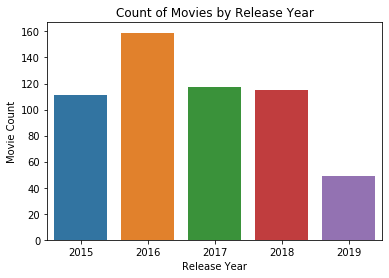

In [22]:
sns.countplot(df.start_year)
plt.xlabel('Release Year')
plt.ylabel('Movie Count')
plt.title('Count of Movies by Release Year');

### Runtime

In [23]:
# Per the charts below, most films in the dataset run between approx. 80 and 150 minutes, 
# with a handful of outliers running beyond the 150 minute mark.

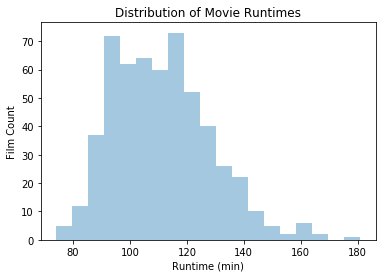

In [24]:
sns.distplot(df["runtime_minutes"], kde=False);
plt.title('Distribution of Movie Runtimes')
plt.ylabel('Film Count')
plt.xlabel('Runtime (min)');

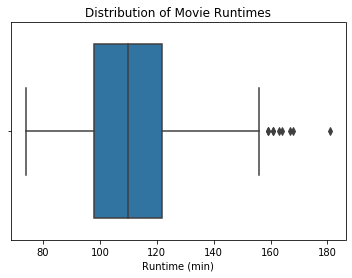

In [25]:
sns.boxplot(data=df, x="runtime_minutes")
plt.xlabel('Runtime (min)')
plt.title('Distribution of Movie Runtimes');

### Audience rating

In [26]:
# This dataset includes films of all ratings, however it may contain overrepresentative samples of PG-13 and
# R-rated films.

In [27]:
df['movrating'].value_counts()

PG-13        232
R            196
PG            88
Not Rated     29
G              3
Unrated        2
Approved       1
Name: movrating, dtype: int64

In [28]:
df.loc[df["movrating"] == 'Unrated', ["movrating"]]  = 'Not Rated'

In [29]:
rateorder = ['G','PG','PG-13','R','Not Rated','Approved']

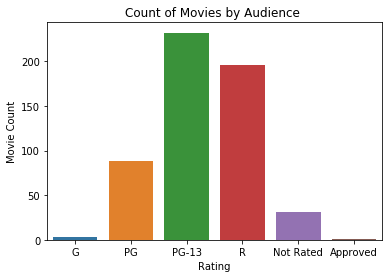

In [30]:
sns.countplot(df.movrating, order = rateorder)
plt.xlabel('Rating')
plt.ylabel('Movie Count')
plt.title('Count of Movies by Audience ');

### Production budget

In [31]:
# The average budget in our dataset was approx. $57 million, but extended as high as #350 million (though
# anything with a budget of over approx $175 million was an outlier).

In [32]:
# creating a budget column in units of millions of USD
df['budget_inmil'] = df.budget.map(lambda x: x/1000000)

In [33]:
df['budget_inmil'].mean()

57.94136324500908

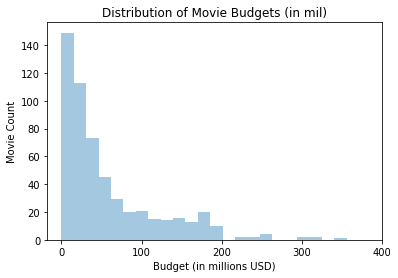

In [34]:
sns.distplot(df["budget_inmil"], kde=False)
plt.xlabel('Budget (in millions USD)')
plt.ylabel('Movie Count')
plt.title('Distribution of Movie Budgets (in mil)')
plt.xticks(np.linspace(start=0, stop=400, num=5));

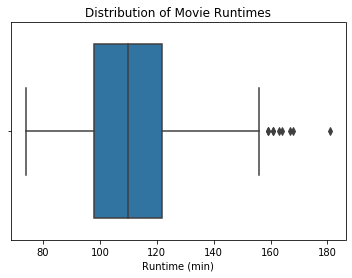

In [35]:
sns.boxplot(data=df, x="runtime_minutes")
plt.xlabel('Runtime (min)')
plt.title('Distribution of Movie Runtimes');

### Gross revenue

In [36]:
# The average gross revenue in our dataset was approx. $219 million, with most films in the dataset grossing 
# between $0 and approximately $600 million.  Additionally, outliers in the dataset grossed up to $3 billion.

In [37]:
# creating a global gross revenue column in units of millions of USD
df['gross_inmil'] = df['global_gross'].map(lambda x: x/1000000)

In [38]:
df['gross_inmil'].mean()

219.16052985480948

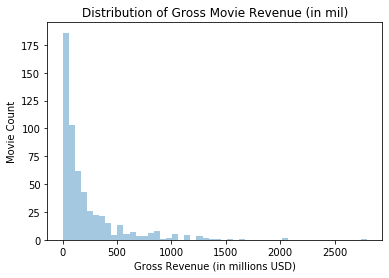

In [39]:
sns.distplot(df["gross_inmil"], kde=False);
plt.xlabel('Gross Revenue (in millions USD)')
plt.ylabel('Movie Count')
plt.title('Distribution of Gross Movie Revenue (in mil)');

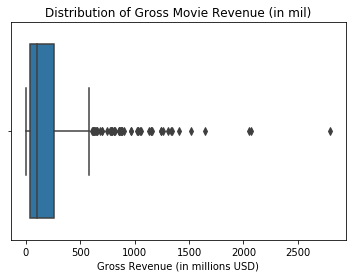

In [40]:
sns.boxplot(data=df, x = "gross_inmil");
plt.title('Distribution of Gross Movie Revenue (in mil)')
plt.xlabel('Gross Revenue (in millions USD)');

### Profitability

In [41]:
# The average film in the dataset returned 4.65x on its budget; 

In [42]:
# create a calulated column for profitability

df['profit_ratio'] = df['gross_inmil'] / df['budget_inmil']

In [43]:
df['profit_ratio'].mean()

4.648958516336651

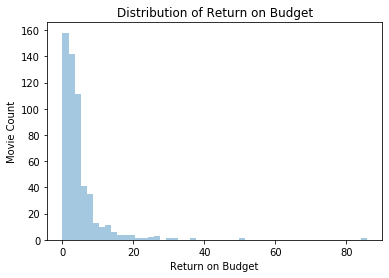

In [44]:
sns.distplot(df["profit_ratio"], kde=False)
plt.xlabel('Return on Budget')
plt.ylabel('Movie Count')
plt.title('Distribution of Return on Budget');

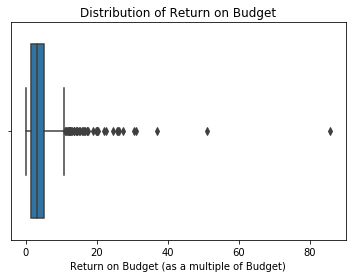

In [45]:
sns.boxplot(data=df, x="profit_ratio")
plt.xlabel('Return on Budget (as a multiple of Budget)')
plt.title('Distribution of Return on Budget');

In [46]:
# I want to categorize all movies in the dataset by their profitability:

df['profit_ratio'].describe()

count    551.000000
mean       4.648959
std        6.261870
min        0.011169
25%        1.475801
50%        3.129662
75%        5.216859
max       85.752315
Name: profit_ratio, dtype: float64

In [47]:
# Splitting data into groups 1 through 4, where 1 is least profitable quartile of movies in the data set
# and 4 is most profitable quartile

df['profitability'] = df['profit_ratio'].map(lambda x: x)

df.loc[df["profit_ratio"] >= 0, ["profitability"]]  = '1'
df.loc[df["profit_ratio"] >= 1.5, ["profitability"]] = '2'
df.loc[df["profit_ratio"] >= 3.1, ["profitability"]] = '3'
df.loc[df["profit_ratio"] >= 5.2, ["profitability"]] = '4'

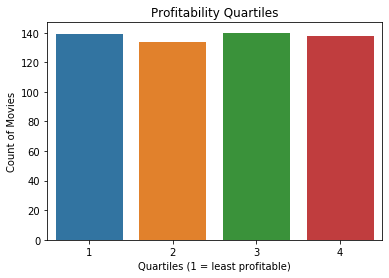

In [48]:
sns.countplot(df['profitability'])
plt.title('Profitability Quartiles')
plt.xlabel('Quartiles (1 = least profitable)')
plt.ylabel('Count of Movies');

### Genre

In [49]:
# Since most movies are tagged with multiple genres, I am uncoupling these groupings to get a count for 
# how many times each individual genre appears in our data

genrelist = []

for i in df['genres']:
    genrelist.extend(i.split(','))

In [50]:
from collections import Counter
c = dict(Counter(genrelist))

In [51]:
df_c = pd.Series(c).sort_values(ascending=False)

In [52]:
df_c.index

Index(['Drama', 'Action', 'Adventure', 'Comedy', 'Thriller', 'Crime', 'Horror',
       'Animation', 'Biography', 'Sci-Fi', 'Fantasy', 'Mystery', 'Romance',
       'Family', 'History', 'Music', 'Sport', 'War', 'Documentary', 'Musical',
       'Western', 'News'],
      dtype='object')

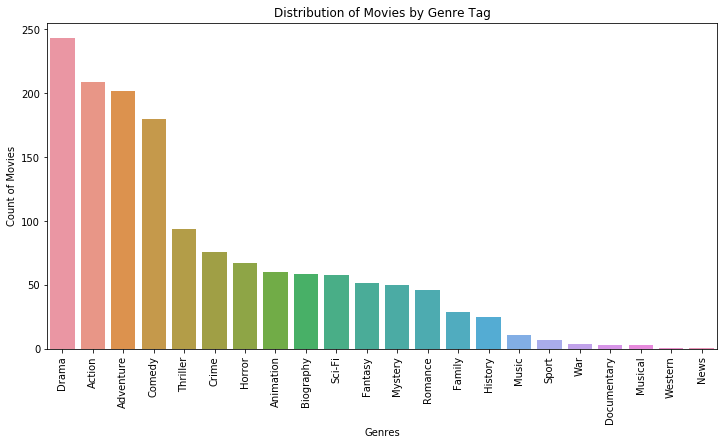

In [53]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(genrelist, order=list(df_c.index))
degrees=45
plt.xticks(rotation='vertical')
plt.xlabel('Genres')
plt.ylabel('Count of Movies')
plt.title('Distribution of Movies by Genre Tag');

## Analysis

### Which audience rating in our dataset is the most profitable?

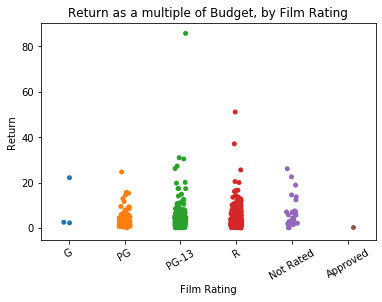

In [59]:
# Based on the below scatter plot, we can see that the highest earning films in our data set are 
# rated either PG-13 or R 

# strip plot, swarm plot, 

sns.stripplot(data = df, x = 'movrating', y = 'profit_ratio', order = rateorder);
plt.xticks(rotation = 30)
plt.xlabel('Film Rating')
plt.ylabel('Return')
plt.title('Return as a multiple of Budget, by Film Rating');

In [55]:
ratexprof = pd.DataFrame(df.groupby('profitability')['movrating'].value_counts())
ratexprof = ratexprof.rename(columns={'movrating':'count'})
ratexprof = ratexprof.reset_index()
ratexprof.head()

,profitability,movrating,count
0,1,R,67
1,1,PG-13,52
2,1,PG,17
3,1,Not Rated,2
4,1,Approved,1


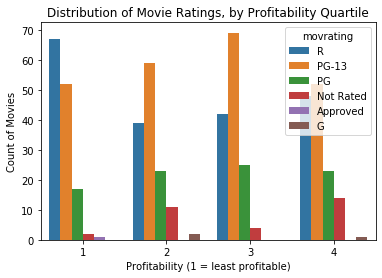

In [56]:
# The below chart indicates that most of the least profitable movies are R-rated, however most of the movies
# in ALL categories are either R or PG-13, so this is not the most informative plot.

sns.barplot(x=ratexprof['profitability'], y=ratexprof['count'], hue=ratexprof['movrating'])
plt.title('Distribution of Movie Ratings, by Profitability Quartile')
plt.xlabel('Profitability (1 = least profitable)')
plt.ylabel('Count of Movies');

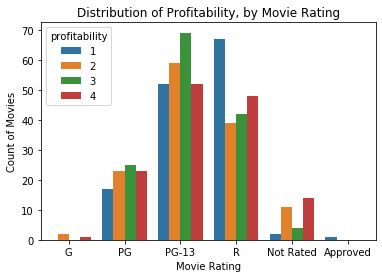

In [58]:
# Grouping the same chart by rating instead of profitability quartile, it becomes more clear that R-rated 
# movies are the most likely to flop (i.e. Profitability =1), whereas PG-13 and PG films tend to 
# perform better.

sns.barplot(x=ratexprof['movrating'], y=ratexprof['count'], hue=ratexprof['profitability'], order=rateorder)
plt.title('Distribution of Profitability, by Movie Rating')
plt.xlabel('Movie Rating')
plt.ylabel('Count of Movies');

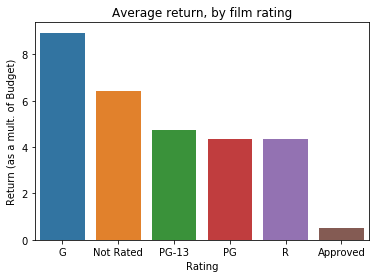

In [46]:
ratingavgprof = pd.DataFrame(df.groupby('movrating')['profit_ratio'].mean())
ratingavgprof = ratingavgprof.reset_index()
ratingavgprof.sort_values('profit_ratio', ascending=False, inplace=True)

sns.barplot(x=ratingavgprof['movrating'], y=ratingavgprof['profit_ratio'])
plt.title('Average return, by film rating')
plt.xlabel('Rating')
plt.ylabel('Return (as a mult. of Budget)');

In [ ]:
# According to the above chart, G-rated movies earn the most return on average, however our n for 
# G-rated films in this data set is only 3, making these results somewhat unreliable

#### BIZ REC:  Target audience rating - PG-13
- Though R and PG-13 films both earned some of the highest returns in our dataset, R-rated films are more likely to land in the least profitable quartile of films than in any other profitability quartile, making PG-13 films the less risky choice for Microsoft.

### Which genre combinations performed the best and the worst financially?

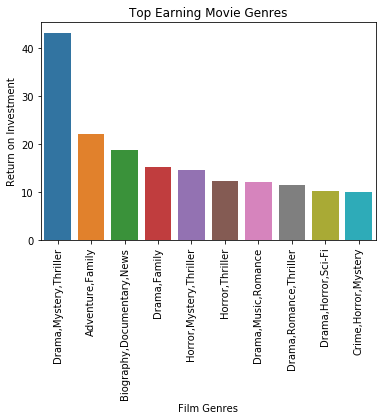

In [156]:
genreavgprof = pd.DataFrame(df.groupby('genres')['profit_ratio'].mean())
genreavgprof = genreavgprof.reset_index()
genreavgprof.sort_values('profit_ratio', ascending=False, inplace=True)
genreavgprof = genreavgprof.head(10)

sns.barplot(x=genreavgprof['genres'], y=genreavgprof['profit_ratio'])
tilt=45
plt.xticks(rotation='vertical')
plt.xlabel('Film Genres')
plt.ylabel('Return on Investment')
plt.title('Top Earning Movie Genre Combos');

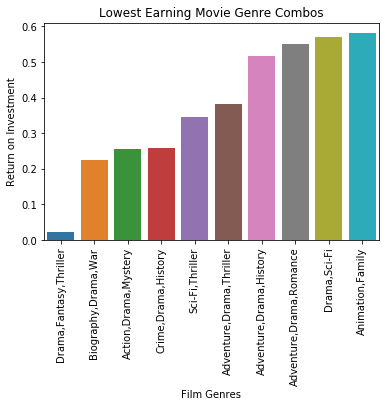

In [159]:
genreavgprof2 = pd.DataFrame(df.groupby('genres')['profit_ratio'].mean())
genreavgprof2 = genreavgprof2.reset_index()
genreavgprof2.sort_values('profit_ratio', inplace=True)
genreavgprof2 = genreavgprof2.head(10)

sns.barplot(x=genreavgprof2['genres'], y=genreavgprof2['profit_ratio'])
tilt=45
plt.xticks(rotation='vertical')
plt.xlabel('Film Genres')
plt.ylabel('Return on Investment')
plt.title('Lowest Earning Movie Genre Combos');

#### BIZ REC:  Target film genre - Thriller
- With the genre combo "Drama, Mystery, Thriller" as the most profitable genre combo on average within our dataset and the high frequency of Drama and Thriller in the genre groupings that make up the most profitable films on average, one of these genres would be a strategic choice for Microsofts first film.  Given the high level of saturation in the Drama category, as indicated by our analysis in section 4.1.7, Thriller has been identified as the better choice for Microsoft between the two.

### Which composer should do the soundtrack?

In [78]:
# Grouping data by composer and calculating mean profit_ratio value earned across all of their films

comps = pd.DataFrame(df.groupby('composer')['profit_ratio'].mean())
comps = comps.reset_index()
comps = comps.sort_values('profit_ratio', ascending=False)

In [89]:
# I need to use ppl_df to pull in the actual names of the composers based on their nconst id

ppl_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [93]:
merge_df = ppl_df.iloc[:,:2]
merge_df.head()

,nconst,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter


In [128]:
# It looks like these 5 composers have the most profitable films on average based on our dataset

comps = comps.merge(merge_df, left_on='composer', right_on='nconst', how='left').head()
comps

,composer,profit_ratio,nconst,primary_name
0,nm3788293,85.752315,nm3788293,Torin Borrowdale
1,nm1615109,37.040775,nm1615109,Nicholas Britell
2,nm8752173,31.949963,nm8752173,Michael Abels
3,nm1853865,27.237284,nm1853865,Matthew Margeson
4,nm0590141,24.658413,nm0590141,Paul Mills


Text(0, 0.5, 'Avg. Return on Budget')

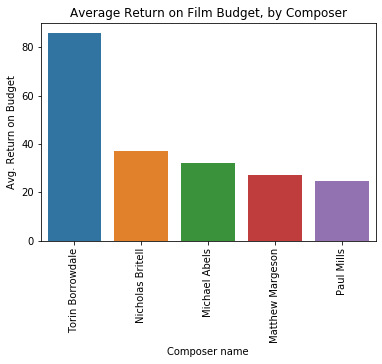

In [129]:
sns.barplot(x=comps['primary_name'], y=comps['profit_ratio'])
plt.xticks(rotation='vertical')
plt.title('Average Return on Film Budget, by Composer')
plt.xlabel('Composer name')
plt.ylabel('Avg. Return on Budget')

In [109]:
# Looking into the top composer, Torin Borrowdale, whose films achieved an almost 86x return on average
# I want to understand what films were included in this calculation and to confirm that my numbers are right

ppl_df[ppl_df['nconst'] == 'nm3788293']

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
281746,nm3788293,Torin Borrowdale,NaN,NaN,"composer,music_department,sound_department","tt3685586,tt7293920,tt4057632,tt7668870"


In [106]:
# Searching my data for all the title ids in Torin's "known_for_titles" column above, I found just one movie of
# his in my final dataset.  This movie had a budget of $880k and grossed over $75 mil globally, resulting in
# the 86x return mentioned above.  So everything looks correct.  But......

df[df['tconst'] == 'tt7668870']

,Unnamed: 0,tconst,primary_title,original_title,start_year,runtime_minutes,genres,actor,actress,composer,...,r females aged 18 29,r top 1000 voters,r us users,r non us users,budget,global_gross,budget_inmil,gross_inmil,profit_ratio,profitability
536,536,tt7668870,Searching,Searching,2018,102.0,"Drama,Mystery,Thriller","nm0158626, nm4334711","nm0005226, nm8045046",nm3788293,...,7.8,6.9,7.7,7.6,880000,75462037,0.88,75.462037,85.752315,4


In [110]:
# I'm also curious who the highest grossing composers are - especially since the results for the most profitable
# composers did not turn up any household names.

comps2 = pd.DataFrame(df.groupby('composer')['gross_inmil'].mean())
comps2 = comps2.reset_index()
comps2 = comps2.sort_values('gross_inmil', ascending=False)

In [112]:
comps2 = comps2.merge(merge_df, left_on='composer', right_on='nconst', how='left').head(10)

In [113]:
comps2

,composer,gross_inmil,nconst,primary_name
0,nm0003911,1377.405338,nm0003911,Brian Tyler
1,nm3234869,1347.071259,nm3234869,Ludwig Göransson
2,nm0579678,1050.693953,nm0579678,Alan Menken
3,nm0002201,966.550600,nm0002201,John Debney
4,nm0653211,903.655259,nm0653211,John Ottman
5,nm0847926,634.151679,nm0847926,Joby Talbot
6,nm0673137,600.641132,nm0673137,Heitor Pereira
7,nm0002354,570.738190,nm0002354,John Williams
8,nm0002353,559.477598,nm0002353,Thomas Newman
9,nm0006133,544.443318,nm0006133,James Newton Howard


Text(0, 0.5, 'Avg. Gross Revenue per Film')

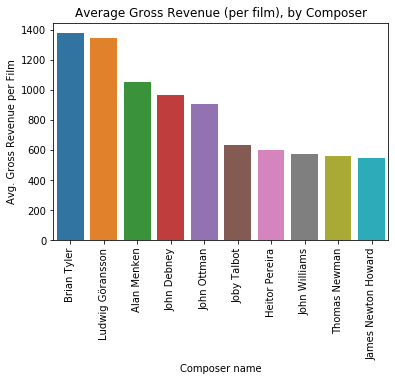

In [120]:
sns.barplot(x=comps2['primary_name'], y=comps2['gross_inmil'])
plt.xticks(rotation='vertical')
plt.title('Average Gross Revenue (per film), by Composer')
plt.xlabel('Composer name')
plt.ylabel('Avg. Gross Revenue per Film')

In [160]:
# SO, though we determined that films with music by Torin Borrowdale profit the most on average, 
# films scored by any of the above 10 composers gross the most global revenue on average (irrespective
# of budget)

#### BIZ REC:  Target composer: Torin Borrowdale
- Films with scores composed by Torin Borrowdale had the highest returns on average (as a multiple of budget.  Though Torin only scored one film in our data set, it was a Thriller which aligns with our previous recommendation for Microsoft's film genre.  Additionally, with his up-and-coming status, we believe Microsoft will be able to negotiate more favorable contract terms with Torin than with a more famous composer such as Alan Menken or John Williams.
